<div style='background-image: url("./title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">The Pseudo-Spectral Method - Numerical Derivatives based on a Derivative Matrix</div>
        </div>
    </div>
</div>

This notebook covers the following aspects:
    
* Calculating a derivative using the differentation theorem of the Fourier Transform
* Define a function that initializes the Chebyshev derivative matrix $D_{ij}$  for a Gaussian function
* Compare with analytical solution

#### Exercise:

Change the analytical function to derive. Choose function with non-zero values at edges (problematic with Fourier, no problem with Chebyshev).


## Basic Equations

Calculating a derivative using the differentation theorem of the Fourier Transform is in the mathematical sense a convolution of the function $f(x)$ with $ik$, where $k$ is the wavenumber and $i$ the imaginary unit. This can also be formulated as a matrix-vector product involving so-called Toeplitz matrices. An elegant (but inefficient) way of performing a derivative operation on a space-dependent function described on the Chebyshev collocation points is by defining a derivative matrix $D_{ij}$

$$ D_{ij} \ = \ -\frac{2 N^2 + 1}{6} \hspace{1.5cm} \text{for  i  = j = N} $$
$$ D_{ij} \ = \ -\frac{1}{2} \frac{x_i}{1-x_i^2} \hspace{1.5cm} \text{for i = j = 1,2,...,N-1} $$
$$ D_{ij} \ = \ \frac{c_i}{c_j} \frac{(-1)^{i+j}}{x_i - x_j} \hspace{1.5cm} \text{for i $\neq$ j =
0,1,...,N}$$

where $N+1$ is the number of Chebyshev collocation points $ \ x_i = cos(i\pi / N)$, $ \ i=0,...,N$ and the $c_i$ are given as

$$ c_i = 2 \hspace{1.5cm} \text{for  i  = 0 or N} $$
$$ c_i = 1 \hspace{1.5cm} \text{otherwise} $$

This differentiation matrix allows us to write the derivative of the function $f_i = f(x_i)$ (possibly depending on time) simply as

$$\partial_x u_i = D_{ij} \ u_j$$

where the right-hand side is a matrix-vector product, and the Einstein summation convention applies.

In [ ]:
# Block 1: Setup and Chebyshev Matrix Function

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython import display # Essential for forcing plot updates in Colab

# Use the inline backend
%matplotlib inline

# Ignore Warning Messages
import warnings
warnings.filterwarnings("ignore")

# Function for setting up the Chebyshev derivative matrix D_ij
def get_cheby_matrix(nx):
    """Initializes the Chebyshev derivative matrix D for nx+1 points."""
    # Chebyshev collocation points x_i = cos(i*pi/N)
    x = np.cos(np.pi * np.arange(nx + 1) / nx)

    # c_i values: c_0=2, c_N=2, c_i=1 otherwise
    cx = np.ones(nx + 1)
    cx[0] = 2.
    cx[nx] = 2.

    # Initialize differentiation matrix D
    D = np.zeros((nx+1, nx+1))

    for i in range(0, nx+1):
        for j in range(0, nx+1):
            if i == j:
                if i == 0:
                    # D_00
                    D[i, i] = (2.*nx**2 + 1.) / 6.
                elif i == nx:
                    # D_NN
                    D[i, i] = -(2.*nx**2 + 1.) / 6.
                else:
                    # D_ii for i = 1, ..., N-1
                    D[i, i] = -x[i] / (2.0 * (1.0 - x[i]**2))
            else:
                # D_ij for i != j
                D[i, j] = (cx[i] / cx[j]) * ((-1.)**(i + j)) / (x[i] - x[j])

    return D, x

print("Chebyshev matrix function defined.")

Chebyshev matrix function defined.


The following cels defines an arbitrary function (e.g. a Gaussian) and initialize its analytical derivative on the Chebyshev collocation points and calculates the numerical derivative and the difference to the analytical solution.

In [ ]:
# Block 2: Exercise Implementation and Calculation

nx = 200    # Number of grid points
D, x = get_cheby_matrix(nx)

# --- EXERCISE: Function with NON-ZERO EDGES ---
# The domain is x in [-1, 1] due to the Chebyshev points definition.

# Test function: f(x) = sin(pi*x) + x + 2
pi = np.pi
f = np.sin(pi * x) + x + 2.0

# Analytical derivative: df/dx = pi*cos(pi*x) + 1
df_ana = pi * np.cos(pi * x) + 1.0

# ----------------------------------------------------------------
# Numerical Calculation
# ----------------------------------------------------------------

# Calculate numerical derivative using differentiation matrix D_{ij}
# The matrix-vector product D @ f performs the derivative.
df_num = D @ f

# Calculate the error metrics
# To make the error visible in the plot (multiplied by a large factor)
df_err_plot = 1e12 * (df_ana - df_num)

# Calculate L2-norm error (relative mean square error)
err = np.sum((df_num - df_ana)**2) / np.sum(df_ana**2) * 100
print(f'Function used: f(x) = sin(pi*x) + x + 2')
print(f'Relative L2-norm Error: {err:.6f}%')

Function used: f(x) = sin(pi*x) + x + 2
Relative L2-norm Error: 0.000000%


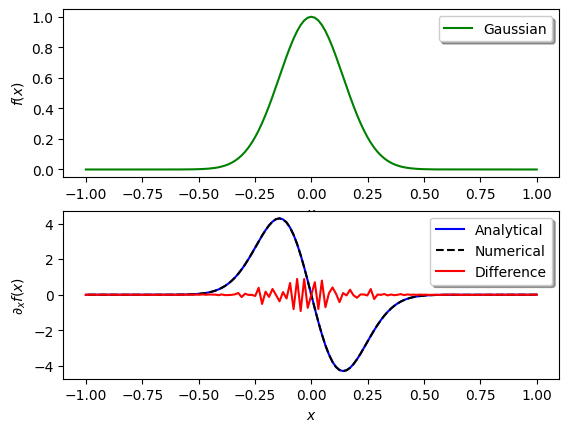

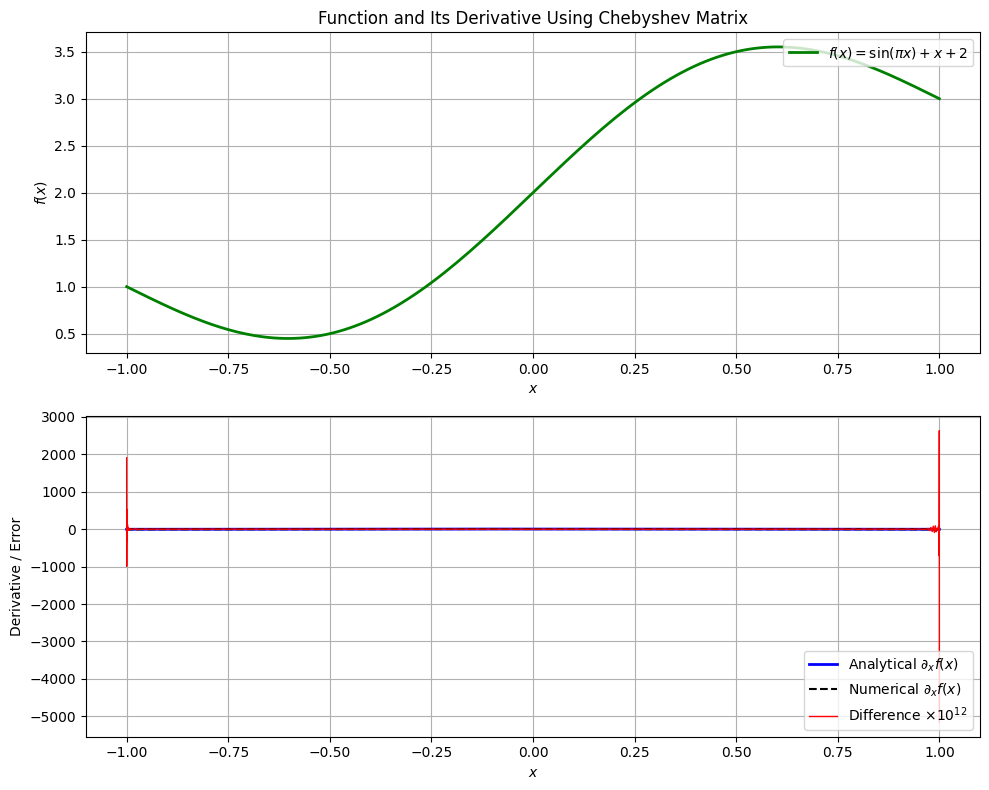

Plot displayed successfully.


In [ ]:
# Block 3: Plotting and Visualization

# ----------------------------------------------------------------
# Plot analytical and numerical derivatives
# ---------------------------------------------------------------
plt.figure(figsize=(10, 8))

# Subplot 1: Original function
plt.subplot(2, 1, 1)
plt.plot(x, f, "g", lw=2, label=r'$f(x) = \sin(\pi x) + x + 2$')
plt.legend(loc='upper right')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Function and Its Derivative Using Chebyshev Matrix')
plt.grid(True)

# Subplot 2: Derivatives and Error
plt.subplot(2, 1, 2)
plt.plot(x, df_ana, "b", lw=2, label='Analytical $\partial_x f(x)$')
plt.plot(x, df_num, 'k--', lw=1.5, label='Numerical $\partial_x f(x)$')
plt.plot(x, df_err_plot, "r", lw=1, label=r'Difference $\times 10^{12}$')
plt.legend(loc='lower right')
plt.xlabel('$x$')
plt.ylabel('Derivative / Error')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Plot displayed successfully.")